<a href="https://colab.research.google.com/github/rayxsun/gender-equality-policy-supervised-machine-learning/blob/main/SUN_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apply unsupervised machine learning method to discover patterns or structures in texts.

Your submission/paper should explain the following within 2 pages (12 pt, double-spaced):

1. In one paragraph, explain your research question or goal, the corpus you use to answer your question, and the method you apply.

2. In one to two paragraphs, explain your unit of analysis (what is one document & what are the features of texts you use) and the pre-processing and vectorization steps. Justify your pre-processing steps.

3. In two to three paragraphs, explain your "model specification" (e.g., number of topics/clusters), and present and interpret the results.

4. In one short paragraph, explain whether the unsupervised method is appropriate for your research goal (it might not be). If the method was not theoratically appropriate, are the results informative or helpful for your research goal?

The identified clusters or topics can be presented in tables -- which do not count towards the 2pg limit of your paper.

You are encouraged to use your own textual data. You can also use the manifesto texts (full or any subset of it) we provided.

If your texts are not in English, please translate the topic or cluster words into English.



In [ ]:
# mount Google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/Colab/ICPSR/assignment/'

In [ ]:
# import modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import gensim # for english
from gensim import models
from gensim.corpora.dictionary import Dictionary

# for LDA
from gensim.models.ldamodel import LdaModel, CoherenceModel


In [ ]:
# For preprocessing
from gensim.parsing.preprocessing import STOPWORDS, remove_stopwords
from gensim.parsing.preprocessing import strip_punctuation
from gensim.parsing.preprocessing import stem_text
from gensim.parsing.preprocessing import strip_multiple_whitespaces
from gensim.parsing.preprocessing import strip_numeric, strip_short
from gensim.parsing.preprocessing import preprocess_string, strip_tags


In [ ]:
dt= pd.read_csv(data_path + 'news_article.csv')

In [ ]:
dt.head()

,articleid,text,date,year,source
0,Daily_2017_07-05,Working fathers in East China's Jiangsu provin...,5-Jul-17,2017,Daily
1,Daily_2021_03-10,CPPCC member Chen Xia appeals for greater chil...,10-Mar-21,2021,Daily
2,Daily_2021_07-07,More details needed on how third-child policy ...,7-Jul-21,2021,Daily
3,Daily_2022_01-12,BEIJING - The moment they are picked up from k...,12-Jan-22,2022,Daily
4,Daily_2022_03-04,As China's demographic development is at a key...,4-Mar-22,2022,Daily


unit: article

In [ ]:
len(dt)

19

# pre-processing

In [ ]:
dt_text = list(dt['text'])

In [ ]:
# Extend the predefined list of stopwords
custom_stop_words = STOPWORDS.union({'said', 'year', 'days', 'says', 'time' ,'people', 'therefore'})

In [ ]:
# Define custom preprocessing filters
def custom_remove_stopwords(s):
    return ' '.join([word for word in s.split() if word not in custom_stop_words])


In [ ]:
def merge_similar_words(s):
    word_replacements = {
        'child': 'child',
        'children': 'child',
        'father': 'father',
        'fathers': 'father',
        'woman': 'women',
        'women': 'women',
        'mother': 'mother',
        'mothers': 'mother',
        'man': 'men',
        'men': 'men'
        }
    tokens = s.split()
    merged_tokens = [word_replacements.get(word, word) for word in tokens]
    return ' '.join(merged_tokens)

In [ ]:
# Use filters
CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation, strip_multiple_whitespaces,
                  strip_numeric, merge_similar_words, custom_remove_stopwords, stem_text, strip_short]
# Preprocess the documents
clean_docs = [preprocess_string(doc, CUSTOM_FILTERS) for doc in dt['text']]

In [ ]:
print(clean_docs[:5])

[['work', 'father', 'east', 'china', 'jiangsu', 'provinc', 'paid', 'patern', 'leav', 'care', 'newborn', 'doubl', 'chines', 'provinc', 'jiangsu', 'govern', 'legal', 'offic', 'draft', 'local', 'regul', 'solicit', 'public', 'opinion', 'chang', 'stipul', 'new', 'father', 'patern', 'leav', 'addit', 'joint', 'parent', 'leav', 'design', 'promot', 'gender', 'equal', 'employ', 'encourag', 'husband', 'wive', 'share', 'housework', 'govern', 'welcom', 'parent', 'netizen', 'alik', 'zhong', 'lei', 'father', 'old', 'girl', 'nanj', 'consid', 'have', 'second', 'child', 'chang', 'nightmar', 'daughter', 'born', 'especi', 'wife', 'new', 'mother', 'need', 'help', 'great', 'month', 'work', 'care', 'newborn', 'accord', 'jiangsu', 'women', 'feder', 'china', 'nationwid', 'regul', 'patern', 'leav', 'provinc', 'municip', 'regul', 'patern', 'leav', 'vari', 'huang', 'xinwei', 'pregnanc', 'postpartum', 'psycholog', 'specialist', 'nanj', 'matern', 'child', 'health', 'hospit', 'longer', 'period', 'patern', 'leav', 'b

# vectorization

In [ ]:

# build id: token dictionary of vocab
dictionary = Dictionary(clean_docs)

# build bag-of-words using doc2bow
bow = [dictionary.doc2bow(a) for a in clean_docs]

# LDA

In [ ]:
# Build the LDA model
num_topics = 4 # I only have 19 articles, so I tried the number of articles 3, 4, 5, 6 and 7
random_seed = 42

lda_model = LdaModel(bow, num_topics=num_topics,
                     random_state = random_seed,
                     id2word=dictionary, passes=10)

In [ ]:
# print the top words per topic
# interpret the top words to infer the topic label

lda_model.print_topics(num_words=10)

[(0,
  '0.020*"leav" + 0.015*"child" + 0.012*"women" + 0.012*"work" + 0.009*"china" + 0.009*"chen" + 0.008*"matern" + 0.008*"social" + 0.007*"employ" + 0.007*"polici"'),
 (1,
  '0.037*"child" + 0.019*"famili" + 0.013*"parent" + 0.013*"leav" + 0.010*"support" + 0.010*"polici" + 0.008*"china" + 0.008*"women" + 0.007*"servic" + 0.007*"popul"'),
 (2,
  '0.023*"china" + 0.020*"child" + 0.016*"popul" + 0.011*"leav" + 0.010*"women" + 0.010*"famili" + 0.009*"polici" + 0.008*"year" + 0.008*"matern" + 0.007*"develop"'),
 (3,
  '0.025*"child" + 0.021*"parent" + 0.020*"leav" + 0.016*"father" + 0.015*"women" + 0.010*"men" + 0.009*"swedish" + 0.008*"allow" + 0.006*"china" + 0.006*"chines"')]

In [ ]:
# get the topic prevalence for one document
lda_model.get_document_topics(bow[0])

[(0, 0.99616283)]

In [ ]:
# save topic model to drive
# save the entire model
lda_model.save(data_path + 'LDA_t4')

In [ ]:
# Load the model
lda_model = models.LdaModel.load(data_path + 'LDA_t4')

In [ ]:
lda_model.print_topics(num_words=10)

[(0,
  '0.020*"leav" + 0.015*"child" + 0.012*"women" + 0.012*"work" + 0.009*"china" + 0.009*"chen" + 0.008*"matern" + 0.008*"social" + 0.007*"employ" + 0.007*"polici"'),
 (1,
  '0.037*"child" + 0.019*"famili" + 0.013*"parent" + 0.013*"leav" + 0.010*"support" + 0.010*"polici" + 0.008*"china" + 0.008*"women" + 0.007*"servic" + 0.007*"popul"'),
 (2,
  '0.023*"china" + 0.020*"child" + 0.016*"popul" + 0.011*"leav" + 0.010*"women" + 0.010*"famili" + 0.009*"polici" + 0.008*"year" + 0.008*"matern" + 0.007*"develop"'),
 (3,
  '0.025*"child" + 0.021*"parent" + 0.020*"leav" + 0.016*"father" + 0.015*"women" + 0.010*"men" + 0.009*"swedish" + 0.008*"allow" + 0.006*"china" + 0.006*"chines"')]

In [ ]:
# save a document-topic distribution as dataframe
# Get the document-topic distribution
doc_topics = []
for i, doc in enumerate(bow):
    doc_topics.append(lda_model.get_document_topics(doc, minimum_probability=0)) # set parameters: minimum_probability=0

# Convert the document-topic distribution to a DataFrame
topic_dist_df = pd.DataFrame([[topic_prob[1] for topic_prob in doc] for doc in doc_topics])

In [ ]:
topic_dist_df # ## topic prevelance in the topic.

,0,1,2,3
0,0.996163,0.001288,0.001283,0.001266
1,0.997805,0.000738,0.000733,0.000724
2,0.998560,0.000483,0.000483,0.000474
3,0.000670,0.997992,0.000673,0.000665
4,0.001028,0.001031,0.996952,0.000990
5,0.000500,0.998504,0.000505,0.000491
6,0.000696,0.000703,0.997915,0.000686
7,0.997506,0.000841,0.000835,0.000817
8,0.000885,0.000891,0.000890,0.997335
9,0.001386,0.001384,0.001376,0.995854


In [ ]:
topic_dist_df.to_csv(data_path + "topic_dist_df.csv", index=False)

In [ ]:
# load the saved csv file
pd.read_csv(data_path + "topic_dist_df.csv")

,0,1,2,3
0,0.996163,0.001288,0.001283,0.001266
1,0.997805,0.000738,0.000733,0.000724
2,0.998560,0.000483,0.000483,0.000474
3,0.000670,0.997992,0.000673,0.000665
4,0.001028,0.001031,0.996952,0.000990
5,0.000500,0.998504,0.000505,0.000491
6,0.000696,0.000703,0.997915,0.000686
7,0.997506,0.000841,0.000835,0.000817
8,0.000885,0.000891,0.000890,0.997335
9,0.001386,0.001384,0.001376,0.995854


In [ ]:
# identify the dominate topic for each document

doc_topics = []
for doc_bow in bow:
    topic_probs = lda_model.get_document_topics(doc_bow)
    #
    dominant_topic = max(topic_probs, key=lambda x: x[1])  # Get the topic with the highest probability
    doc_topics.append(dominant_topic)

In [ ]:
# a closer look inside of max(items, key= lamda x: x[1])
# use one document for example
prob = lda_model.get_document_topics(bow[0])
# prob is the list of (topic, probability) tuple
print(prob)
# print one x[1] value
print(prob[0][1]) # for tuple, the first tuple (0), second value(1)

#put it together
max(prob, key=lambda x: x[1]) # for each item in the list, return highest probabilities

[(0, 0.9961611)]
0.9961611


(0, 0.9961611)

In [ ]:
# Convert to DataFrame
doc_dominant_topic = pd.DataFrame(doc_topics, columns=['DominantTopic', 'Probability'])

In [ ]:
doc_dominant_topic.head()

,DominantTopic,Probability
0,0,0.996162
1,0,0.997805
2,0,0.998560
3,1,0.997992
4,2,0.996952


In [ ]:
doc_dominant_topic = dt.join(doc_dominant_topic) # merge dataframes

In [ ]:
doc_dominant_topic.head()

,articleid,text,date,year,source,DominantTopic,Probability
0,Daily_2017_07-05,Working fathers in East China's Jiangsu provin...,5-Jul-17,2017,Daily,0,0.996162
1,Daily_2021_03-10,CPPCC member Chen Xia appeals for greater chil...,10-Mar-21,2021,Daily,0,0.997805
2,Daily_2021_07-07,More details needed on how third-child policy ...,7-Jul-21,2021,Daily,0,0.998560
3,Daily_2022_01-12,BEIJING - The moment they are picked up from k...,12-Jan-22,2022,Daily,1,0.997992
4,Daily_2022_03-04,As China's demographic development is at a key...,4-Mar-22,2022,Daily,2,0.996952


In [ ]:
# given we identified dominant topic for each document
# we can easily find the most representative document for each topic
topic_documents = {}
num_documents = 10
for i in range(num_topics):
  docs = doc_dominant_topic[doc_dominant_topic['DominantTopic'] == i]
  # sort the data frame in descending order
  docs.sort_values(by='Probability', ascending=False, inplace=True)
  topic_documents[f"topic_{i}"] = docs.text[: num_documents].tolist()

<ipython-input-32-47c54096de7c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  docs.sort_values(by='Probability', ascending=False, inplace=True)


In [ ]:
topic_documents.keys()

dict_keys(['topic_0', 'topic_1', 'topic_2', 'topic_3'])

In [ ]:
# label dominant topics
topic_labels = {
    0: 'Parental Leave and Employment',
    1: 'Family Support and Parental Policies',
    2: 'Demographics and Policy Development',
    3: 'Role of Fathers and Gender Dynamics'
}

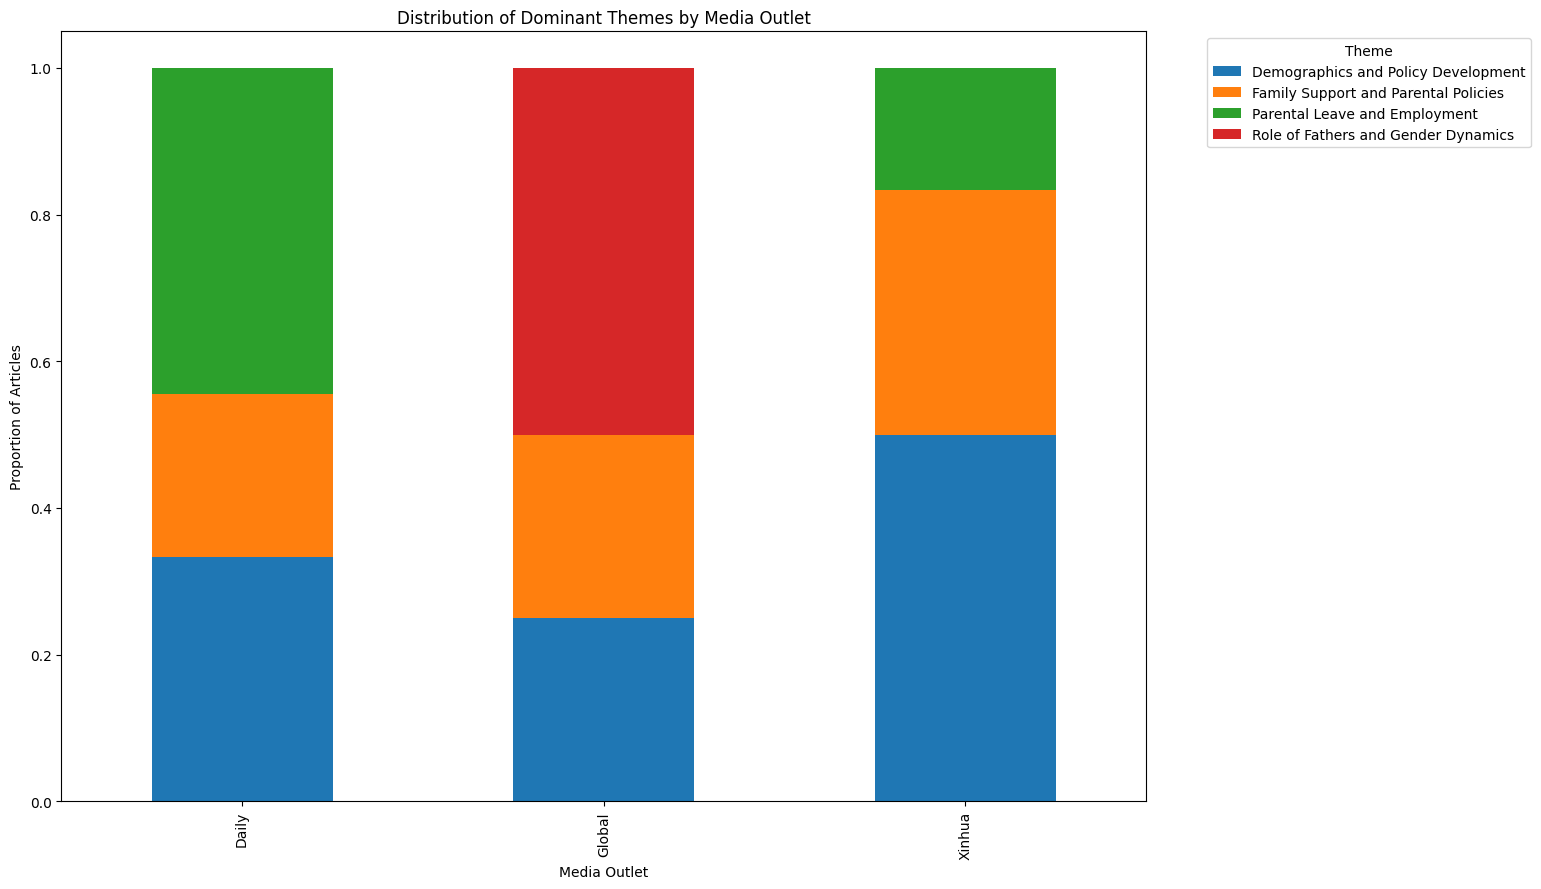

In [ ]:
# Add the topic labels to the DataFrame
doc_dominant_topic['TopicLabel'] = doc_dominant_topic['DominantTopic'].map(topic_labels)

# Aggregate topic counts by media outlet and topic labels
topic_distribution_labeled = doc_dominant_topic.groupby(['source', 'TopicLabel']).size().unstack(fill_value=0)

# Normalize the counts to get the distribution
topic_distribution_labeled = topic_distribution_labeled.div(topic_distribution_labeled.sum(axis=1), axis=0)

# Plot the topic distribution with labels for each media outlet
topic_distribution_labeled.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Distribution of Dominant Themes by Media Outlet')
plt.xlabel('Media Outlet')
plt.ylabel('Proportion of Articles')
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='best')
plt.show()


# Evaluate number of topics through coherence matrix

In [ ]:
# Calculate coherence score for 1 model
# coherencemodel in gensm
# take preprocess documents
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_docs,
                                     dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

0.37249354624127945

In [ ]:
# make a function to compute coherence scores
# for a range of topic numbers
def compute_coherence_values(dictionary, bow, cleaned_texts, min, max, step):
    coherence_values = []
    model_list = []
    for num_topics in range(min, max, step):
        model = LdaModel(bow, num_topics=num_topics,
                         id2word=dictionary, passes=10)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=cleaned_texts,
                                         dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

In [ ]:
# calculate the coherence scores
# for models with N from 1 to 10

model_list, coherence_values = compute_coherence_values(dictionary, bow,
                                                        clean_docs, min = 1,
                                                        max = 10, step = 1)

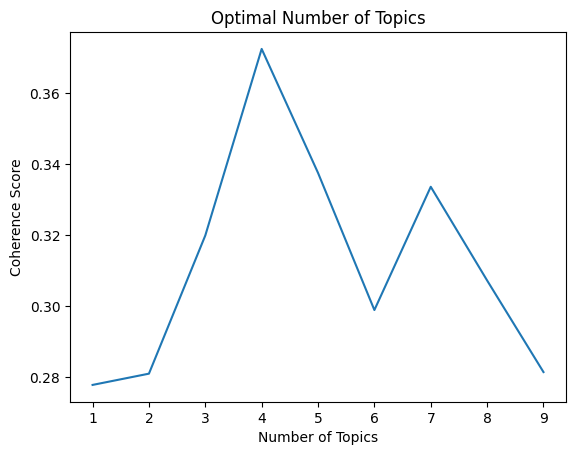

In [ ]:
# Plot coherence scores
x = range(1, 10, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show() # 5 is the optimal number of topics

# vizualization

## 1. Word Clouds for Each Topic

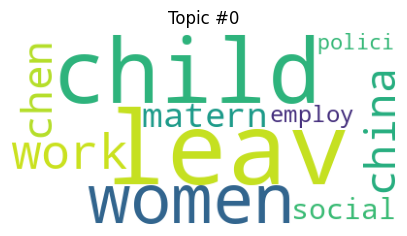

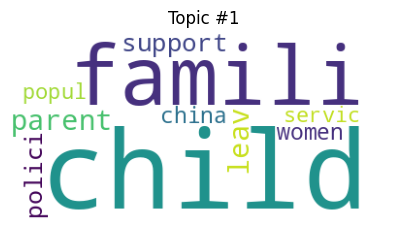

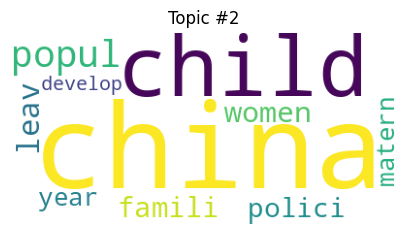

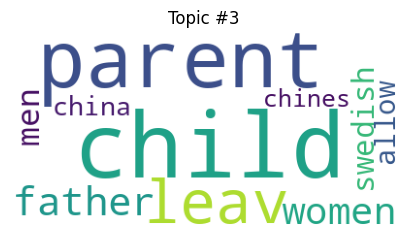

In [ ]:
from wordcloud import WordCloud

# Function to plot word cloud for each topic
def plot_word_clouds(lda_model, num_topics, num_words=10):
    for t in range(num_topics):
        plt.figure(figsize=(5, 5))
        plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(t, num_words))))
        plt.axis("off")
        plt.title(f"Topic #{t}")
        plt.show()

# Plot word clouds
plot_word_clouds(lda_model, num_topics)

##2. Using pyLDAvis for Interactive Visualization

In [ ]:
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.9 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare data for visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3. Bar Charts for Topic Distribution in Documents

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


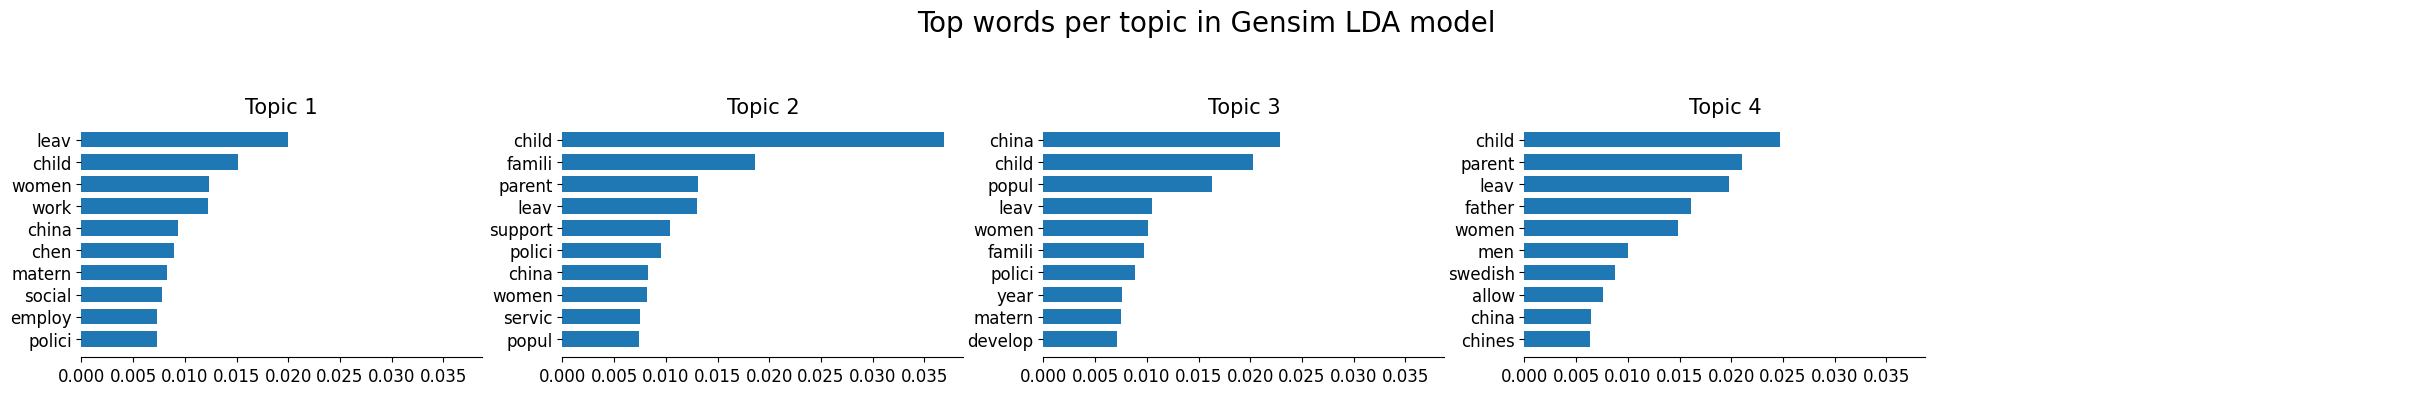

In [ ]:
# Function to plot top words in bar charts with corrected dictionary mapping
def plot_top_words(model, dictionary, n_top_words, title):
    n_topics = model.num_topics
    n_cols = 5
    n_rows = (n_topics + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4), sharex=True)
    axes = axes.flatten()
    for i in range(n_cols * n_rows):
        if i < n_topics:
            top_features_ind = [x[0] for x in model.get_topic_terms(i, topn=n_top_words)]
            top_features = [dictionary[id] for id in top_features_ind]
            weights = [x[1] for x in model.get_topic_terms(i, topn=n_top_words)]
            axes[i].barh(top_features, weights, height=0.7)
            axes[i].set_title(f'Topic {i + 1}', fontdict={'fontsize': 15})
            axes[i].invert_yaxis()
            axes[i].tick_params(axis='both', which='major', labelsize=12)
        else:
            axes[i].axis('off')
        for spine in 'top right left'.split():
            axes[i].spines[spine].set_visible(False)
    fig.suptitle(title, fontsize=20)
    plt.subplots_adjust(top=0.70, hspace=0.3)
    plt.show()

# Plot top words in bar charts
plot_top_words(lda_model, dictionary.id2token, 10, "Top words per topic in Gensim LDA model")

